In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [162]:
N = 2**20
N_NONZERO = 2**10

p = N_NONZERO / N
items, s = [], []
for item in range(N):
    if np.random.binomial(1,p):
        items.append(item)
        s.append(np.abs(np.random.normal(100, 20)))
        
items = np.array(items)
s = np.ceil(np.array(s).flatten()).astype(int)

In [180]:
def Ground(items, s):
    new_items = []
    new_s = []
    for i in range(s.shape[0]):
        val = s[i]
        v1 = np.random.randint(1, val-1)
        val -= v1
        v2 = np.random.randint(1, val)
        val -= v2
        
        new_items.append(items[i])
        new_items.append(items[i])
        new_items.append(items[i])
        new_s.append(v1)
        new_s.append(v2)
        new_s.append(val)

    return (np.array(new_items).flatten(), np.array(new_s).flatten())

In [181]:
items, s = Ground(items, s)

In [189]:
stream_items = np.column_stack((items,s))
df = pd.DataFrame(stream_items)
df.to_csv('dataset/insert_only_stream.csv', index=False, header=False)

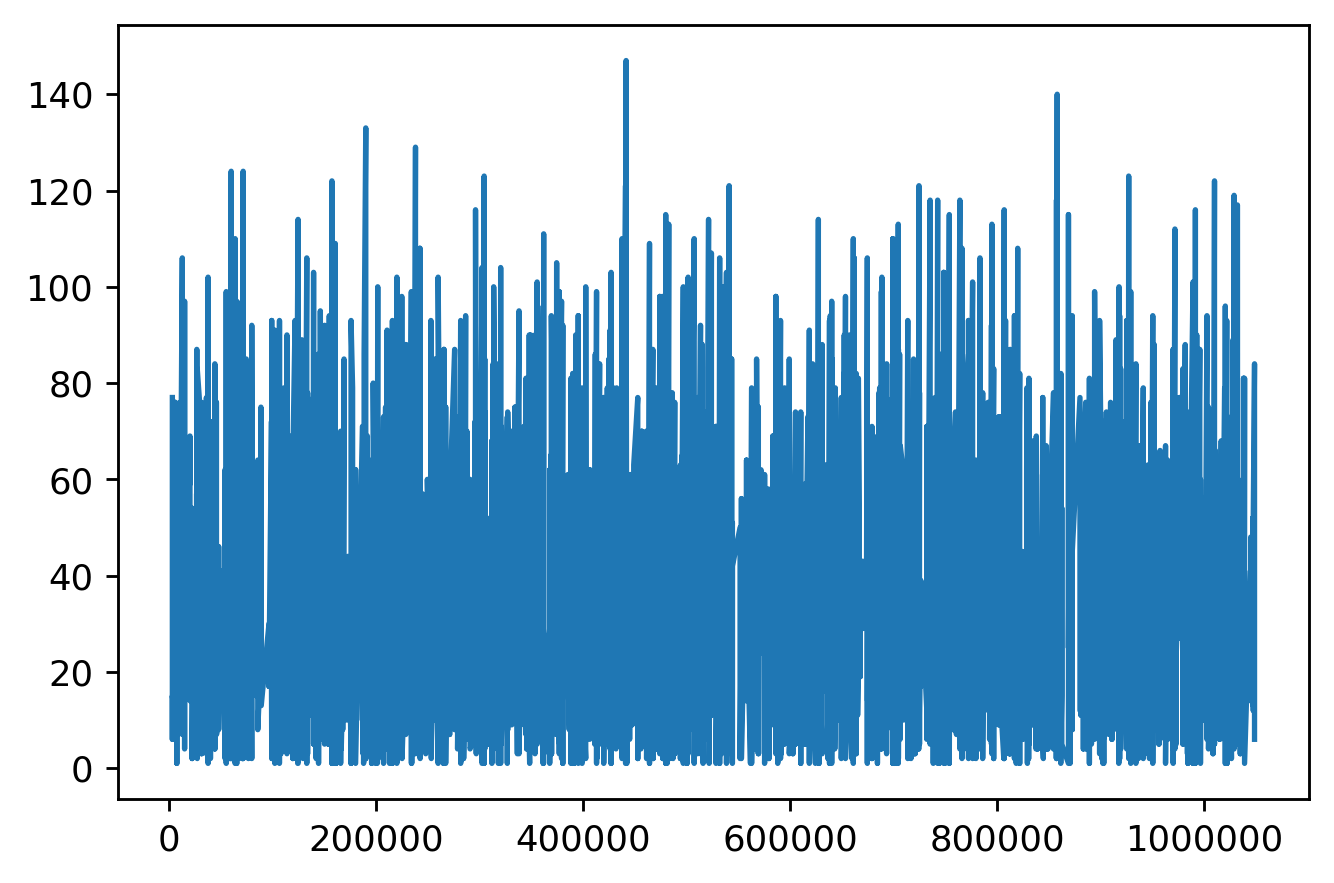

In [184]:
FIGURE_RESOLUTION = 256
plt.rcParams['figure.dpi'] = FIGURE_RESOLUTION

plt.plot(items, s)
# plt.plot(np.arange(2**10), [beta.pdf(x,a=0.5,b=0.5,scale=2**10) for x in np.arange(2**10)])
# plt.title('Per-round Cumulative Reward By OfflineEvaluation')
# plt.xlabel('Round')
# plt.ylabel('Per-round Cumulative Reward')
# plt.legend()
plt.show()

### 1-Sparse Data

In [38]:
N = 2**16
STREAM_SIZE = 2**8
p = STREAM_SIZE / N

items = []
s = []

for i in range(0, N):
    if np.random.binomial(1,p):
        items.append(i)
        val = np.round(np.random.normal(0, 20))
        if val == 0:
            val = 1
        s.append(val)
        
items = np.array(items)
s = np.ceil(np.array(s).flatten()).astype(int)

In [37]:
def WaterFall(items, s):
    new_items = []
    new_s = []

    for i in range(items.shape[0]):
        new_items.append(items[i])
        new_s.append(-s[i])

    new_items = np.append(np.array(items), np.array(new_items))
    new_s = np.append(np.array(s), np.array(new_s))
    
    new_items = np.append(23, new_items)
    new_s = np.append(6, new_s)
    
    return (new_items, new_s)

def Interleave(items, s):
    temp_items = []
    temp_s = []

    for i in range(items.shape[0]):
        temp_items.append(items[i])
        temp_s.append(-s[i])
    
    temp_items = np.array(temp_items)
    temp_s = np.array(temp_s)
    
    new_items = np.empty((items.size + temp_items.size,), dtype=items.dtype)
    new_items[0::2] = items
    new_items[1::2] = temp_items
    
    new_s = np.empty((s.size + temp_s.size,), dtype=items.dtype)
    new_s[0::2] = s
    new_s[1::2] = temp_s
    
    new_items = np.append(23, new_items)
    new_s = np.append(6, new_s)
    
    return (new_items, new_s)

In [39]:
waterfall_items, waterfall_s = WaterFall(items, s)
interleave_items, interleave_s = Interleave(items, s)

In [42]:
stream_items = np.column_stack((waterfall_items,waterfall_s))
df = pd.DataFrame(stream_items)
df.to_csv('dataset/1Sparse_stream_waterfall.csv', index=False, header=False)

In [43]:
stream_items = np.column_stack((interleave_items,interleave_s))
df = pd.DataFrame(stream_items)
df.to_csv('dataset/1Sparse_stream_interleave.csv', index=False, header=False)

### K-Sparse Data

In [94]:
N = 2**16
SUPP_VECTOR_SIZE = 10**3
p = SUPP_VECTOR_SIZE / N

streams = np.array([])
supp_items = np.array([])

for i in range(N):
    freq = np.round(np.random.normal(0, 20))
    if freq == 0:
        freq = 1
    streams = np.append(streams, [i, freq])
    if np.random.binomial(1,1-p):
        streams = np.append(streams, (i, -freq))
    else:
        supp_items = np.append(supp_items, (i, freq))
        
streams = streams.reshape((streams.shape[0]//2, 2)).astype(int)
np.random.shuffle(streams)
supp_items = np.array(supp_items).astype(int)
supp_items = supp_items.reshape((supp_items.shape[0]//2,2))

In [95]:
df = pd.DataFrame(streams)
df.to_csv('dataset/KSparse_stream_large_size.csv', index=False, header=False)
df = pd.DataFrame(supp_items)
df.to_csv('dataset/KSparse_supp_vector_large_size.csv', index=False, header=False)

##### Zero Items

In [93]:
N = 2**16

streams = np.array([])
for i in range(N):
    freq = np.round(np.random.normal(0, 20))
    if freq == 0:
        freq = 1
    streams = np.append(streams, (i, freq))
    streams = np.append(streams, (i, -freq))
        
streams = streams.reshape((streams.shape[0]//2, 2)).astype(int)
np.random.shuffle(streams)

df = pd.DataFrame(streams)
df.to_csv('dataset/KSparse_zero_items.csv', index=False, header=False)

### Mini DataSet for L0Dynamic

In [96]:
N = 2**16
SUPP_VECTOR_SIZE = 10**3
p = SUPP_VECTOR_SIZE / N

streams = np.array([])

for i in range(N):
    if np.random.binomial(1,p):
        freq = np.round(np.random.normal(0, 20))
        if freq == 0:
            freq = 1
        streams = np.append(streams, (i, freq))
        
streams = streams.reshape((streams.shape[0]//2, 2)).astype(int)
np.random.shuffle(streams)

df = pd.DataFrame(streams)
df.to_csv('dataset/L0Dynamic_Mini.csv', index=False, header=False)

In [97]:
df.describe()

,0,1
count,989.000000,989.000000
mean,33016.409505,-0.065723
std,19110.558543,20.000120
min,37.000000,-54.000000
25%,16781.000000,-13.000000
50%,33638.000000,1.000000
75%,49359.000000,13.000000
max,65507.000000,61.000000
